In [1]:
#Data saved in csv/excel
import glob, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data_dir="C:/Users/tsb7592/Box/Avera NIHTB Data"
os.chdir(data_dir)

# Compute the Total response time in minutes

In [2]:
# get all files from all RC In-person subdirectories

all_files = glob.glob('C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\*\\In Person\\*CB_Data.csv')

doc =[]
for file in all_files:
    data = pd.read_csv(file)
    print(file)
    doc.append(data)

# get all files from all SF
all_files = glob.glob('C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\*\\In Person\\*CB_Data.csv')
for file in all_files:
    data = pd.read_csv(file)
    print(file)
    doc.append(data)

all_files = glob.glob('C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\*\\In Person\\*PVT_Data.csv')
sep= []
for file in all_files:
    data = pd.read_csv(file)
    print(file)
    if data.shape[1]!= 11:
        doc.append(data)

    else:
        sep.append(data)
df = pd.concat(doc)

C:\Users\tsb7592\Box\Avera NIHTB Data\Rapid City\EPRC_00032\In Person\210330_EPRC_00032_A_8Y_NT_CB_Data.csv
C:\Users\tsb7592\Box\Avera NIHTB Data\Rapid City\EPRC_00160\In Person\210423_EPRC_00160_A_8Y_NT_CB_Data.csv
C:\Users\tsb7592\Box\Avera NIHTB Data\Rapid City\EPRC_00162\In Person\210407_EPRC_00162_A_8Y_NT_CB_Data.csv
C:\Users\tsb7592\Box\Avera NIHTB Data\Rapid City\EPRC_00173\In Person\210331_EPRC_00173_A_8Y_NT_CB_Data.csv
C:\Users\tsb7592\Box\Avera NIHTB Data\Rapid City\EPRC_00179\In Person\210427_EPRC_00179_A_8Y_NT_CB_Data.csv
C:\Users\tsb7592\Box\Avera NIHTB Data\Rapid City\EPRC_00181\In Person\210420_EPRC_00181_A_8Y_NT_CB_Data.csv
C:\Users\tsb7592\Box\Avera NIHTB Data\Rapid City\EPRC_00183\In Person\210422_EPRC_00183_8Y_NT_CB_Data.csv
C:\Users\tsb7592\Box\Avera NIHTB Data\Rapid City\EPRC_00191\In Person\210506_EPRC_00191_A_8Y_NT_CB_Data.csv
C:\Users\tsb7592\Box\Avera NIHTB Data\Rapid City\EPRC_00380\In Person\210419_EPRC_00380_A_8Y_NT_CB_Data.csv
C:\Users\tsb7592\Box\Avera NIH

In [3]:
sdf = pd.concat(sep)

In [4]:
sdf.shape

(403, 11)

In [5]:
#Set two decimal points for display
pd.options.display.float_format = "{:.2f}".format

In [6]:
df.columns

Index(['PIN', 'DeviceID', 'Assessment Name', 'InstOrdr', 'InstSctn', 'ItmOrdr',
       'Inst', 'Locale', 'ItemID', 'Response', 'Score', 'Theta', 'TScore',
       'SE', 'DataType', 'Position', 'ResponseTime', 'DateCreated',
       'InstStarted', 'InstEnded', 'App Version', 'iPad Version',
       'Firmware Version'],
      dtype='object')

In [7]:
#Reshape the data for EPSF_00944 and EPSF_00943 from long to wide
sdf=sdf.pivot_table(index=['PIN', 'DeviceID', 'AssessmentName', 'ResponseID', 'ItemID',
       'InstrumentTitle', 'TestName', 'InstrumentID'], columns='Key', values='Value', aggfunc='first').reset_index()

In [8]:
sdf.columns=['PIN', 'DeviceID', 'Assessment Name', 'ResponseID', 'ItemID',
       'Inst', 'TestName', 'InstrumentID', 'App Version', 'DataType',
       'DateCreated', 'Firmware Version', 'InstEnded',
      'InstOrdr', 'InstSctn', 'InstStarted',
       'ItmOrdr', 'Locale', 'Position', 'Response', 'ResponseTime', 'SE',
       'Score', 'Theta', 'iPad Version']

In [9]:
sdf =sdf.drop(columns=['ResponseID','TestName','InstrumentID'])

In [10]:
#combine all the data for time calculation
df = df.append(sdf)

In [11]:
df.shape

(3292, 23)

In [12]:
df['PIN'] = df['PIN'].str[7:19]

In [13]:
#Convert to datetime
df['InstStarted']= pd.to_datetime(df['InstStarted'])
df['InstEnded']= pd.to_datetime(df['InstEnded'])
df['DateCreated']= pd.to_datetime(df['DateCreated'])


In [16]:
# get all files from all RC Remote subdirectories

all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City/*/Remote/*CB_Data_R.csv')


doc =[]
for file in all_files:
    data = pd.read_csv(file)
    doc.append(data)
    print(file)

# get all files from all SF Remote subdirectories
all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls/*/Remote/*CB_Data_R.csv')

for file in all_files:
    data = pd.read_csv(file)
    doc.append(data) 
    print(file)

dfr = pd.concat(doc)

C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\EPRC_00032\Remote\210406_EPRC_00032_A_8Y_NT_CB_Data_R.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\EPRC_00160\Remote\210416_EPRC_00160_A_8Y_NT_CB_Data_R.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\EPRC_00162\Remote\210414_EPRC_00162_A_8Y_NT_CB_Data_R.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\EPRC_00173\Remote\210408_EPRC_00173_A_8Y_NT_CB_Data_R.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\EPRC_00179\Remote\210420_EPRC_00179_A_8Y_NT_CB_Data_R.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\EPRC_00181\Remote\210415_EPRC_00181_A_8Y_NT_CB_Data_R.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\EPRC_00183\Remote\210415_EPRC_00183_A_8Y_NT_CB_Data_R.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\EPRC_00191\Remote\210426_EPRC_00191_A_8Y_NT_CB_Data_R.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\EPRC_00380\Remote\210412_EPRC_00380_A_8Y_NT_CB_Data_R.csv
C:/Users/tsb7592/Box/Avera NIHTB Data

In [17]:
dfr.columns

Index(['PIN', 'DeviceID', 'Assessment Name', 'InstOrdr', 'InstSctn', 'ItmOrdr',
       'Inst', 'Locale', 'ItemID', 'Response', 'Score', 'Theta', 'TScore',
       'SE', 'DataType', 'Position', 'ResponseTime', 'DateCreated',
       'InstStarted', 'InstEnded', 'App Version', 'iPad Version',
       'Firmware Version'],
      dtype='object')

In [18]:
dfr['PIN']=dfr['PIN'].replace(' ', '', regex=True)

In [19]:
dfr['PIN'] = dfr['PIN'].str[7:19]

In [20]:
dfr['InstStarted']= pd.to_datetime(dfr['InstStarted'])
dfr['InstEnded']= pd.to_datetime(dfr['InstEnded'])
dfr['DateCreated']= pd.to_datetime(dfr['DateCreated'])

In [36]:
def Combine_diff(df, dfr, select):
    new =select_inst(df, select)
    newr =select_inst(dfr, select)
    
    new=calculate_betweentime(new)
    newr =calculate_betweentime(newr)
    newr.columns=['PIN', 'ItemID', 'DateCreated_R', 'ResponseTime_R','BetweenItemTime_R']

    rv = pd.merge(new, newr, on=["PIN",'ItemID'])
    
    #Use Response Time to calculate the BetweenTimeDiff
    rv.loc[:,'BetweenTimeDiff'] = rv.loc[:,'ResponseTime_R'] - rv.loc[:,'ResponseTime']

    return rv

In [74]:
Insts= {'flanker':'Flanker',"DCCS":'Dimensional Change Card', 'PC':'Pattern Comparison','OR':'Oral Reading',
       'PSM':'Picture Sequence Memory','PV':'Picture Vocabulary'}

In [23]:
df.Inst.unique()

array(['NIH Toolbox Picture Vocabulary Test Age 3+ Practice v2.1',
       'NIH Toolbox Picture Vocabulary Test Age 3+ v2.1',
       'NIH Toolbox Flanker Inhibitory Control and Attention Test Ages 8-11 v2.1',
       'NIH Toolbox List Sorting Working Memory Test Age 7+ v2.1',
       'NIH Toolbox Dimensional Change Card Sort Test Ages 8-11 v2.1',
       'NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ Practice v2.1',
       'NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1',
       'NIH Toolbox Picture Sequence Memory Test Age 8+ Form A v2.1',
       'NIH Toolbox Oral Reading Recognition Test Age 3+ v2.1'],
      dtype=object)

In [93]:
dfr[dfr.Inst=='NIH Toolbox Oral Reading Recognition Test Age 3+ v2.1'].ResponseTime.describe()

count                325
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
75%      0 days 00:00:00
max      0 days 00:00:00
Name: ResponseTime, dtype: object

In [92]:
df[df.Inst=='NIH Toolbox Oral Reading Recognition Test Age 3+ v2.1'].ResponseTime.describe()

count    411.00
unique     1.00
top        0.00
freq     411.00
Name: ResponseTime, dtype: float64

In [14]:
def select_inst(df, select):
    sdata = df.set_index('Inst').filter(like=select, axis=0)
    data= sdata[['PIN','ItemID','DateCreated','ResponseTime']]
    return data

In [59]:
def calculate_betweentime(data):
    new_ti=[]
    for pin in data.PIN.unique():
        subset=data[data['PIN']==pin]
        subset['BetweenItemTime']=subset['DateCreated'].diff()
        new_ti.append(subset)
        
    new =pd.concat(new_ti)
    new['ResponseTime']= pd.to_timedelta(new['ResponseTime'], unit='s', errors='coerce')
    new['BetweenItemTime']=round(new['BetweenItemTime'].dt.total_seconds(),2)
    new['ResponseTime']=round(new['ResponseTime'].dt.total_seconds(),2)

    return new

In [65]:
import numpy as np
import scipy.stats as stats

In [68]:
dc= {}
for key in Insts:
    data =Combine_diff(df, dfr, Insts[key])
    dc[key] =data
    filedir ='C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Timing\\'+key+'.csv'
    data.to_csv(filedir, index=False)
    
    #T-test

    print('***A matched t-test for those who have both in-person and remote -',Insts[key])
    print('t-statistic =%6.2f, pvalue =%6.2f' % stats.ttest_ind(data.dropna().BetweenItemTime, data.dropna().BetweenItemTime_R, equal_var = False))
    print('degree of Freedom: ',(data.dropna().shape[0]-1))
    print('')

***A matched t-test for those who have both in-person and remote - Oral Reading
t-statistic = -1.29, pvalue =  0.20
degree of Freedom:  210

***A matched t-test for those who have both in-person and remote - Pattern Comparison
t-statistic =  1.85, pvalue =  0.06
degree of Freedom:  511

***A matched t-test for those who have both in-person and remote - Picture Sequence Memory
t-statistic = -0.63, pvalue =  0.53
degree of Freedom:  61

***A matched t-test for those who have both in-person and remote - Flanker
t-statistic = -2.46, pvalue =  0.01
degree of Freedom:  367

***A matched t-test for those who have both in-person and remote - Dimensional Change Card
t-statistic = -1.34, pvalue =  0.18
degree of Freedom:  591

***A matched t-test for those who have both in-person and remote - Picture Vocabulary
t-statistic = -0.84, pvalue =  0.40
degree of Freedom:  151



# Regression

In [69]:
keep=['ItemID','BetweenTimeDiff']

In [70]:
def dummy_variable(variable, df):
    '''
    Using the binned columns, replace them with dummy columns.
    Inputs:
    df: A panda dataframe
    variable: A list of column headings for binned variables
    Outputs:
    df:A panda dataframe
    '''
    dummy_df = pd.get_dummies(df[variable]).rename(columns = lambda x: str(x))
    df = pd.concat([df, dummy_df], axis=1)
    df.drop([variable], inplace = True, axis=1)
    
    return df

In [71]:
import statsmodels.api as sm

def Regress(df, exp=False):
    reg = dummy_variable('ItemID', df)
    reg=reg.dropna()
    reg['intercept'] = 1.0
    y = np.array(reg['BetweenTimeDiff']).reshape(-1,1)
    X =reg.iloc[:,1:]
    ols_model = sm.OLS(y, X)
    ols_results = ols_model.fit()

    print(ols_results.summary())
    print('')
    print('')
    print('Exponential Results')
    exp_model = sm.OLS(np.exp(y), X)
    exp_results = exp_model.fit()
    print(exp_results.summary())
    print('')

In [76]:
dc['OR']

,PIN,ItemID,DateCreated,ResponseTime,BetweenItemTime,DateCreated_R,ResponseTime_R,BetweenItemTime_R,BetweenTimeDiff
0,EPRC_00032_A,LARE080,2021-03-30 10:19:21,0.00,NaN,2021-04-06 16:02:21,0.00,7.00,0.00
1,EPRC_00032_A,LARE033,2021-03-30 10:19:24,0.00,3.00,2021-04-06 16:01:42,0.00,3.00,0.00
2,EPRC_00032_A,LARE057,2021-03-30 10:19:28,0.00,4.00,2021-04-06 16:01:52,0.00,4.00,0.00
3,EPRC_00032_A,LARE088,2021-03-30 10:19:35,0.00,7.00,2021-04-06 16:02:38,0.00,5.00,0.00
4,EPRC_00032_A,LARE052,2021-03-30 10:19:41,0.00,6.00,2021-04-06 16:02:55,0.00,5.00,0.00
...,...,...,...,...,...,...,...,...,...
223,EPSF_00944_A,LARE050,2021-04-16 17:05:51,0.00,4.00,2021-04-09 17:25:57,0.00,7.00,0.00
224,EPSF_00944_A,LARE078,2021-04-16 17:06:02,0.00,2.00,2021-04-09 17:26:09,0.00,4.00,0.00
225,EPSF_00944_A,LARE104,2021-04-16 17:06:08,0.00,4.00,2021-04-09 17:25:29,0.00,5.00,0.00
226,EPSF_00944_A,LARE105,2021-04-16 17:06:16,0.00,8.00,2021-04-09 17:26:05,0.00,4.00,0.00


In [89]:
for meas in dc:
    if meas =='OR':
        continue
    print(Insts[meas])
    Regress(dc[meas][keep].dropna())

Pattern Comparison
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.8283
Date:                Thu, 24 Jun 2021   Prob (F-statistic):              0.785
Time:                        18:45:14   Log-Likelihood:                -576.71
No. Observations:                 512   AIC:                             1249.
Df Residuals:                     464   BIC:                             1453.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PSPAC002      -0.0249      0.211 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                 -0.216
Method:                 Least Squares   F-statistic:                    0.5672
Date:                Thu, 24 Jun 2021   Prob (F-statistic):              0.991
Time:                        18:45:14   Log-Likelihood:                -397.96
No. Observations:                 152   AIC:                             921.9
Df Residuals:                      89   BIC:                             1112.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LAVOC091         1.7814      2.502      0.712   

# Plots
Plot two figures. For both the x-axis is the ItemIDs (as it progresses through the measure, so the practice should come first, then the live items – no need to sort this other than the sequence in which the measures appear). It will get crowded so you can remove the text, I just need the order to be right so we know where in the assessment these difference scores are small or large.
On the y-axis: for Figure 1, TimeDiff, for Figure 2, BetweenTimeDiff

In [79]:
def save_median_mean(df):
    mni = df[keep].groupby('ItemID')['BetweenTimeDiff'].mean().reset_index()
    mni['Type'] = 'mean'
    mne = df[keep].groupby('ItemID')['BetweenTimeDiff'].median().reset_index()
    mne['Type'] = 'median'
    rv = mni.append(mne, ignore_index=True)
    return rv

In [85]:
Insts

{'flanker': 'Flanker',
 'DCCS': 'Dimensional Change Card',
 'PC': 'Pattern Comparison',
 'OR': 'Oral Reading',
 'PSM': 'Picture Sequence Memory',
 'PV': 'Picture Vocabulary'}

In [81]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
def draw(sdata, meas):
    sns.set() #change style

    # Create a visualization
    g=sns.relplot(data=sdata,  x="ItemID", y="BetweenTimeDiff", hue='Type',height=8.27, aspect=11.7/8.27)
    g.set_xticklabels(rotation=60)
    g.set(ylabel='BetweenTimeDiff = Remote – InPerson')
    g.despine(trim=True)
    g.fig.suptitle(meas+"(mean and median) by Item")
    leg = g._legend
   

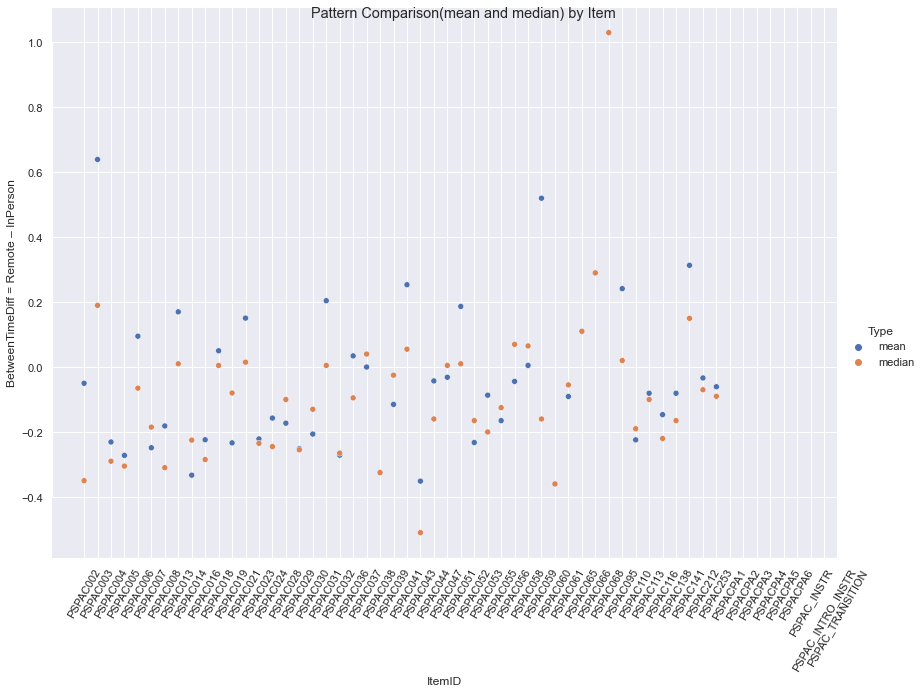

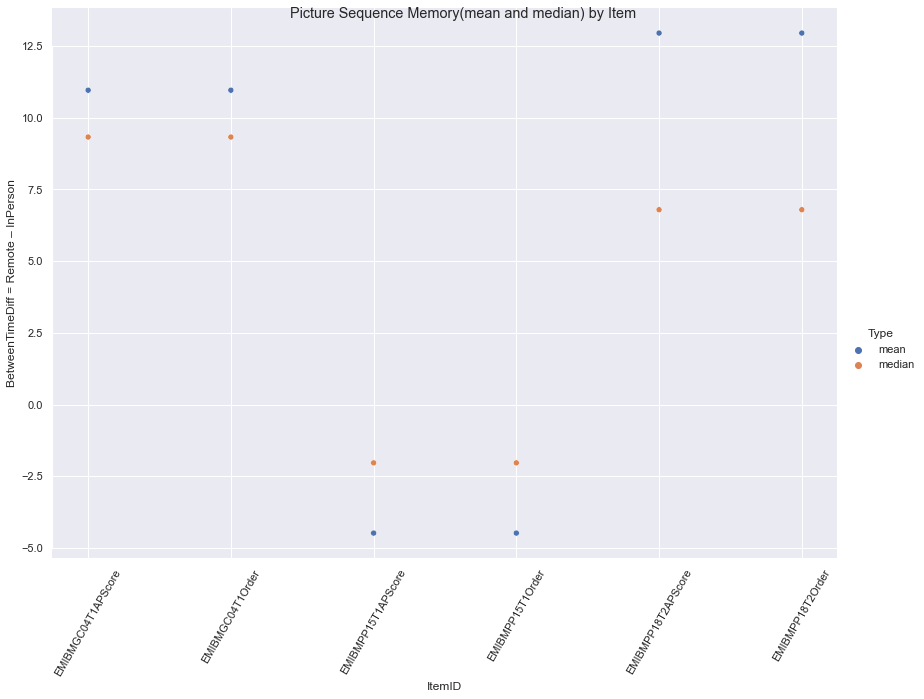

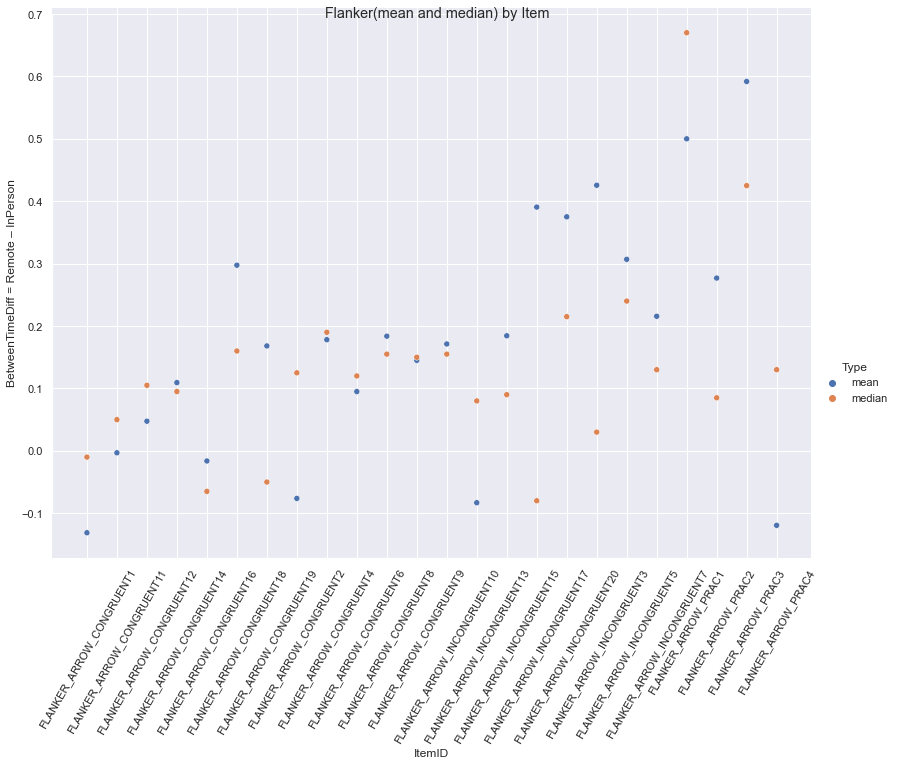

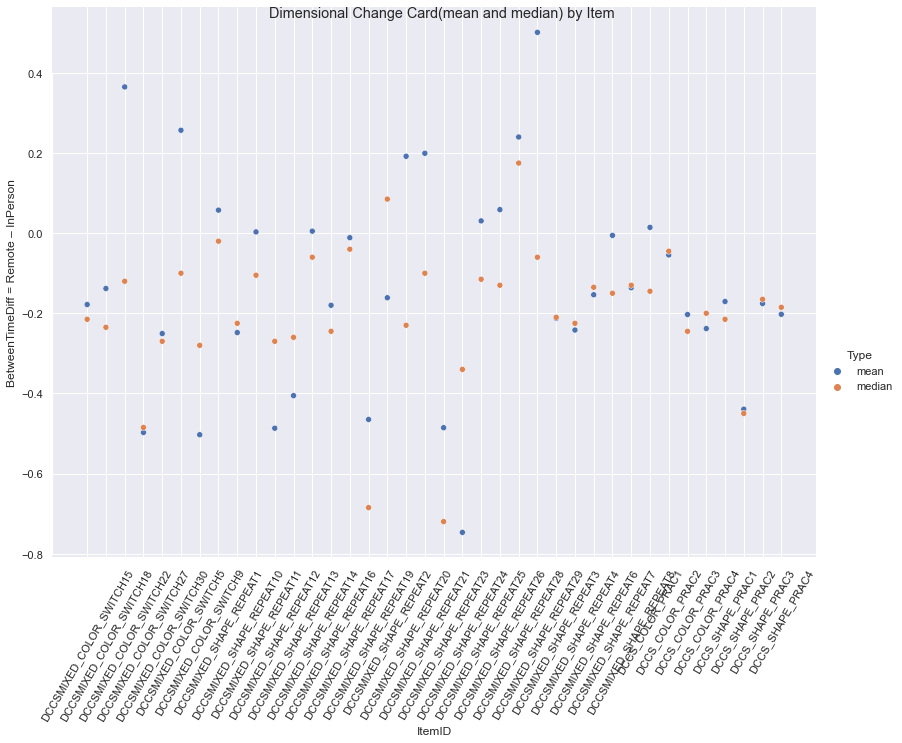

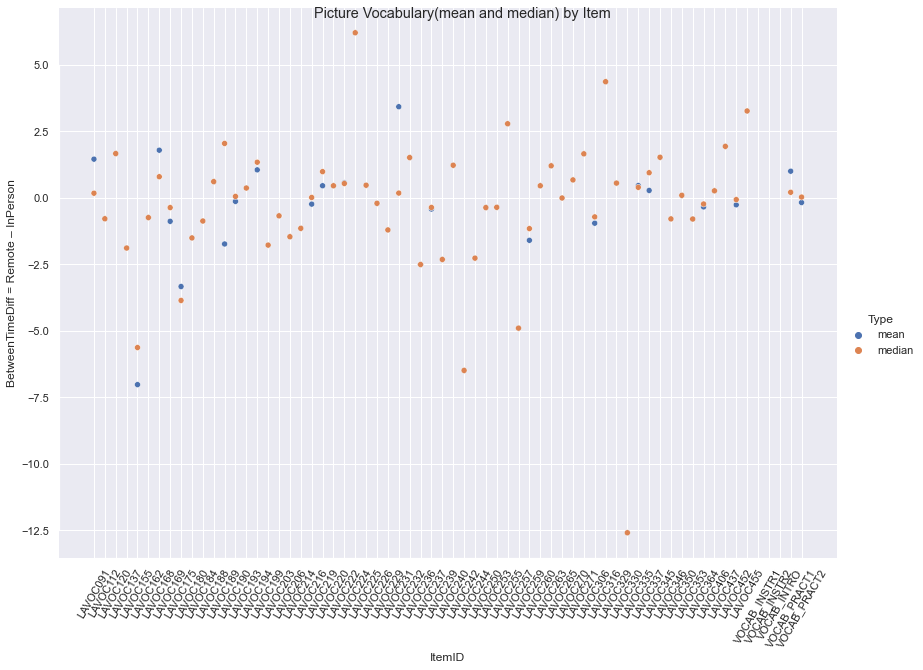

In [87]:
for meas in dc:
    if meas =='OR':
        continue
    data =save_median_mean(dc[meas])
    draw(data, Insts[meas])

# Old code

In [ ]:
# Adding jitter
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() #change style

#the points are adjusted (only along the categorical axis) so that they don’t overlap. 
g=sns.catplot(data=flanker,  x="ItemID", y="BetweenTimeDiff", hue='PIN',palette="crest", dodge=True, kind="swarm",
                height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=60)
g.fig.suptitle("Flanker by Item")
leg = g._legend
leg.set_bbox_to_anchor([1,1])   # coordinates of lower left of bounding box

In [ ]:
g=sns.catplot(data=dccs,  x="ItemID", y="BetweenTimeDiff", hue='PIN',palette="crest", dodge=True, kind="swarm",
                height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=60)
g.fig.suptitle("DCCS by Item")
leg = g._legend
leg.set_bbox_to_anchor([0.9,0.8])   # coordinates of lower left of bounding box

In [ ]:
g=sns.catplot(data=pc,  x="ItemID", y="BetweenTimeDiff", hue='PIN',palette="crest", dodge=True, kind="swarm",
                height=8.27, aspect=11.7/8.27)

g.set_xticklabels(rotation=60)
g.fig.suptitle("Pattern Comparison by Item")
leg = g._legend
leg.set_bbox_to_anchor([1,0.8])   # coordinates of lower left of bounding box